In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import pandas as pd

In [2]:
#wczytanie zbioru iris(irysy)
iris = sns.load_dataset("iris")

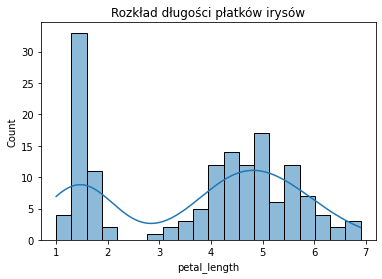

In [4]:
#tworzenie histogramu
sns.histplot(iris["petal_length"],bins=20,kde=True)

plt.title('Rozkład długości płatków irysów')
plt.show()

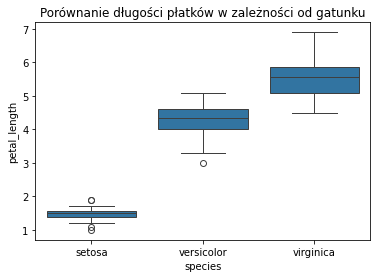

In [5]:
#tworzenie wykresu typu boxplot
sns.boxplot(x="species",y="petal_length",data=iris)
plt.title("Porównanie długości płatków w zależności od gatunku")
plt.show()

In [7]:
#utworzenie macierzy korelacji między cechami w zbiorze danych iris - heatmapa
#obliczenie macierzy korealacji
corr = iris.corr(numeric_only=True)

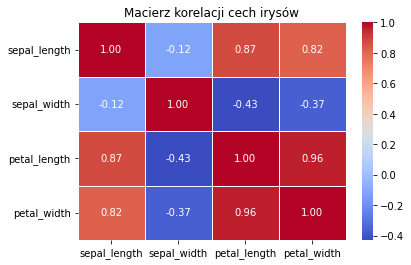

In [8]:
#tworzenie heatmapy
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Macierz korelacji cech irysów")
plt.show()

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
#dane odstające
#z-score dla długości płatków
iris["petal_length_zscore"] = zscore(iris["petal_length"])

In [17]:
#wykryeanie danych odstających (zscore > 3 lub < -3)
outliers = iris[iris["petal_length_zscore"].abs()>3]

In [18]:
print(f"dane odstające: {outliers}")

dane odstające: Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species, petal_length_zscore]
Index: []


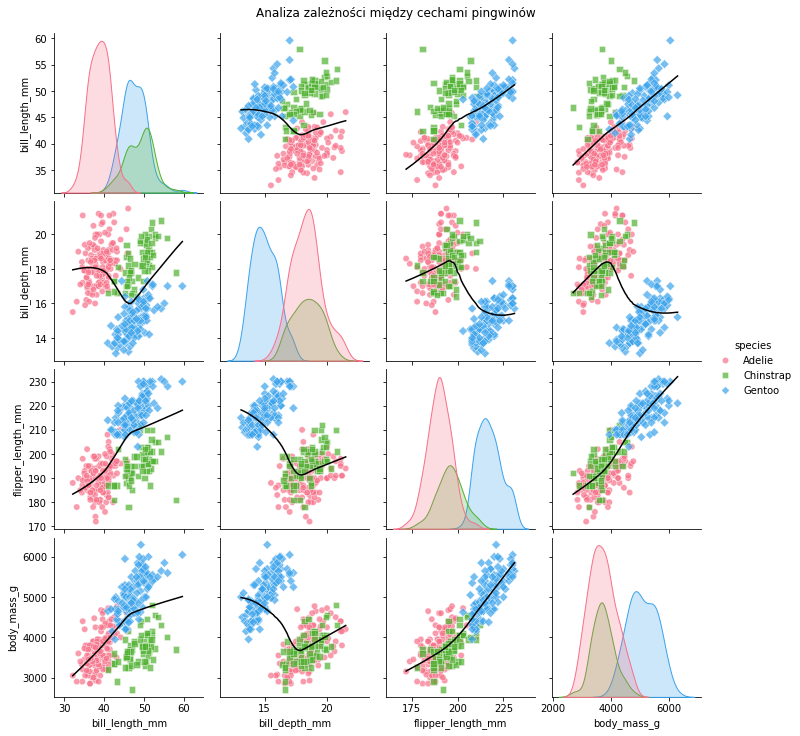

In [20]:
# Wczytanie danych
penguins = sns.load_dataset("penguins").dropna()  # Usuwamy brakujące wartości

# Tworzenie wykresu parowego z mapowaniem kolorów i dopasowaniem regresji
g = sns.pairplot(
    penguins, 
    hue="species",  # Kolorowanie według gatunku
    markers=["o", "s", "D"],  # Różne znaczniki dla każdego gatunku
    diag_kind="kde",  # Wykresy gęstości na przekątnej
    palette="husl",  # Kolorystyka
    plot_kws={'alpha': 0.7, 's': 40},  # Przezroczystość i rozmiar punktów
)

# Dodanie dopasowania regresji Lowess do wykresów rozrzutu
for ax in g.axes.flatten():
    if ax is not None and hasattr(ax, 'get_xlabel'):
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel and ylabel and xlabel != ylabel:
            sns.regplot(
                data=penguins, 
                x=xlabel, 
                y=ylabel, 
                scatter=False, 
                lowess=True, 
                ax=ax, 
                line_kws={'color': 'black', 'lw': 1.5}
            )

plt.suptitle("Analiza zależności między cechami pingwinów", y=1.02)
plt.show()